In [13]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

**Importing the dataset**

In [15]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [16]:
x = df.iloc[:, 2:4].values
y = df.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


**Feature Scaling**

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

**Fitting K-NN to the Training set**

In [18]:
for i in [1,2,3,4,5,6,7,8,9,10]:
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(x_train, y_train)
  print('k :', i , "Train Accuracy : ", clf.score(x_train,y_train))
  print('k :', i , "Val Accuracy : ", np.mean(cross_val_score(clf, x_train, y_train, cv=10)))
  print()

k : 1 Train Accuracy :  0.996875
k : 1 Val Accuracy :  0.853125

k : 2 Train Accuracy :  0.921875
k : 2 Val Accuracy :  0.846875

k : 3 Train Accuracy :  0.915625
k : 3 Val Accuracy :  0.8875

k : 4 Train Accuracy :  0.909375
k : 4 Val Accuracy :  0.875

k : 5 Train Accuracy :  0.91875
k : 5 Val Accuracy :  0.903125

k : 6 Train Accuracy :  0.909375
k : 6 Val Accuracy :  0.890625

k : 7 Train Accuracy :  0.909375
k : 7 Val Accuracy :  0.90625

k : 8 Train Accuracy :  0.909375
k : 8 Val Accuracy :  0.896875

k : 9 Train Accuracy :  0.9125
k : 9 Val Accuracy :  0.90625

k : 10 Train Accuracy :  0.909375
k : 10 Val Accuracy :  0.89375



In [19]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [20]:
y_pred = clf.predict(x_test)

**Making the Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


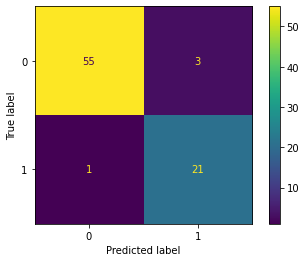

In [21]:
plot_confusion_matrix(clf , x_test, y_test)  
plt.show()